# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

%matplotlib inline 

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Let's check the distribution of human body temperature.  First, plot a histogram to visually check the distribution.  We'll alos print out the skew and kurtosis using scipy stats functions.

Skewness measures the symmetry of a distribution.  The skewness of a normal distribution is expected to be 0.  Negative values of skewness indicate a left skewed distribution and positive values of skewness indicate a right skew in the distribution.  

Kurtosis measures the thickness of a distributions tails.  A normal distribution is expected to have a kurtosis around 3 and often kurtosis is measured in terms of excess kurtosis (difference from 3).  The scipy.kurtosis function return a measure of kurtosis in terms of excess kurtosis.

Visually inspecting the distribution, we can see there is a left skew to the distribution.  This obesrvation is confirmed by the skew calculation. 

Since excess kurtosis is measured relative to a normal distribution, we can have positive and negative values indicating either heavy or light tails.  The excess kurtosis is reported as 0.7 and indicates tail slightly heavier than a normal distribution.

We tend to think that the central limit theorem will hold as n gets large.  the general thought is that this happens around 100 observations.  Thus our sample of 130 can be thought of as large.

We can assume each of these temperature measurements was drawn independent of each other- or that one observation does not depend on another. This is a concept necessary for the central limit theorem to hold. 


skewness of the distribution:  -0.004367976879081625
excess kurtosis of the distribution:  0.7049597854114693
number of observations:  130
mean temperature:  98.24923076923078
variance of temperature:  0.5375575432319613
standard deviation of temperature:  0.733183158039


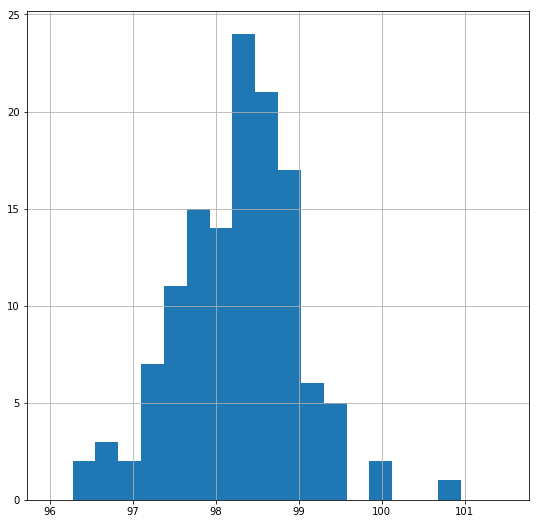

In [17]:
import numpy as np
df['temperature'].hist(bins=20,range=(96,101.5),figsize=(9,9))
temp_skew= stats.skew(df['temperature']) 
temp_kurt= stats.kurtosis(df['temperature']) 
total_obs= len(df['temperature'])
temp_mean= df['temperature'].mean()
temp_var= df['temperature'].var()
temp_sd=np.sqrt(temp_var)
print("skewness of the distribution: ",temp_skew)
print("excess kurtosis of the distribution: ",temp_kurt)
print("number of observations: ",total_obs)
print("mean temperature: ",temp_mean)
print("variance of temperature: ",temp_var)
print("standard deviation of temperature: ",temp_sd)


Is the true population mean really 98.6 degrees F? 
Would you use a one-sample or two-sample test? Why? 
In this situation, is it appropriate to use the 
tt or z z statistic? 
Now try using the other test. How is the result be different? Why? 
Draw a small sample of size 10 from the data and repeat both tests. 
Which one is the correct one to use? 
What do you notice? What does this tell you about the difference in application of the 
t t and z z statistic? 

Now let's test if the mean temperature in our sample is statistically different from the 98.6 we assume is the average human body temperature. We should set up the null hypthosis as 
H0: mean =98.6 and the alternative Ha:  We can use a two-sided t-test to test if our sample mean is different from the population mean of 98.6.





In [20]:
#construct test-statistic
t_stat=(temp_mean-98.6)/(temp_sd/np.sqrt(total_obs))
left_tail= stats.t.ppf(q=0.025, df=129)
right_tail= stats.t.ppf(q=0.975, df=129)

print('t-statistic: ', t_stat)
print('left tail rejection region: ', left_tail)
print('right tail rejection region: ', right_tail)
#stats.ttest_1samp(a=temp_mean,popmean=98.6 )

z_critical = stats.norm.ppf(q = 0.975)

t-statistic:  -5.45482329236
left tail rejection region:  -1.97852449146
right tail rejection region:  1.97852449146
